In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Add2Steps"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_KeepOutlier"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_AddVarSteps_1to2StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Steps_1StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/LargeSlope_Angle_17_26/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26/"

#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingInit"]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1StepbeforeFail_1Time_RemovebyClip",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(38880, 85)
(38880, 14)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(38880, 85)
(38880, 14)
 
Set Up for Validation Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Validation Set Size
(4860, 85)
(4860, 14)
 
 
Set Up for Test Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Test Set Size
(4860, 85)
(4860, 14)
 


In [5]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)

input dim:  85
output dim: 14
 


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [7]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
#Batch size = 1280 for remove outlier, 2560 for keep outlier
history = model.fit(x = x_train, y = y_train, epochs =6000, batch_size = 1280, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/6000
31/31 [==============================] - 0s 6ms/step - loss: 0.1725 - val_loss: 0.1022
Epoch 2/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0602 - val_loss: 0.0273
Epoch 3/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0167
Epoch 4/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 5/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.0132
Epoch 6/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 7/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 8/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 9/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 10/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0099

31/31 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 83/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 84/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 85/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 86/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 87/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 88/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 89/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 90/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 91/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0033
Epoc

31/31 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 163/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 164/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 165/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 166/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 167/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 168/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 169/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 170/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 171/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 243/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 244/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 245/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 246/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 247/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 248/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 249/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 250/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 251/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 323/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 324/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 325/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 326/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 327/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 328/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 329/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 330/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 331/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 403/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 404/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 405/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 406/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 407/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 408/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 409/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 410/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 411/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 483/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 484/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 485/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 486/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 487/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 488/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 489/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 490/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 491/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 563/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 564/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 565/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 566/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 567/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 568/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 569/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 570/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 571/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 643/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 644/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 645/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 646/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 647/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 648/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 649/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 650/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 651/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 723/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 724/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 725/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 726/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 727/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 728/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 729/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 730/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 731/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 803/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 804/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 805/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 806/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 807/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 808/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 809/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 810/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 811/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 883/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 884/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 885/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 886/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 887/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 888/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 889/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 890/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 891/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.

31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 963/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 964/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 965/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 966/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 967/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 968/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 969/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 970/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 971/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.

31/31 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 1043/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1044/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 1045/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 1046/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 1047/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 1048/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1049/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1050/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 1051/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1122/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1123/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1124/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1125/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1126/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 1127/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 1128/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1129/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1130/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1201/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1202/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1203/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1204/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1205/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1206/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1207/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1208/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1209/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1280/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1281/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1282/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1283/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1284/6000
31/31 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1285/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1286/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1287/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 1288/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1359/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1360/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1361/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1362/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1363/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1364/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1365/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1366/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1367/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1438/6000
31/31 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1439/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1440/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1441/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1442/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1443/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1444/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1445/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1446/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1517/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1518/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1519/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1520/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1521/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1522/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1523/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1524/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1525/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 1596/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1597/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1598/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1599/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1600/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1601/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1602/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1603/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1604/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1675/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1676/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1677/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1678/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1679/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1680/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1681/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1682/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 1683/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1754/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1755/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1756/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1757/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1758/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1759/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1760/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1761/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1762/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1833/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1834/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1835/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1836/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1837/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1838/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1839/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1840/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1841/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1912/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1913/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1914/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1915/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1916/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1917/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1918/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1919/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1920/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1991/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 1992/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1993/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 1994/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1995/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1996/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1997/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1998/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 1999/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2070/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2071/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2072/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2073/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2074/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2075/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2076/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2077/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2078/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2149/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2150/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2151/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2152/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2153/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2154/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2155/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2156/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2157/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2228/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2229/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2230/6000
31/31 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2231/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2232/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2233/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2234/6000
31/31 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2235/6000
31/31 [==============================] - ETA: 0s - loss: 0.001 - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2236/6000
31/31 [==================

31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2307/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2308/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2309/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2310/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2311/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2312/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2313/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2314/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2315/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2386/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2387/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2388/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2389/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2390/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2391/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2392/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2393/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2394/6000
31/31 [==============================] - 0s 4ms/step - loss: 0.0012 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2465/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2466/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2467/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2468/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2469/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2470/6000
31/31 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2471/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2472/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2473/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2544/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2545/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2546/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 2547/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2548/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2549/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2550/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2551/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2552/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2623/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2624/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2625/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2626/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2627/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2628/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2629/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2630/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2631/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2702/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2703/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2704/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2705/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2706/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2707/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2708/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2709/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2710/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2781/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2782/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2783/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2784/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2785/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2786/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2787/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2788/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2789/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2860/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2861/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2862/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2863/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2864/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2865/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2866/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2867/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2868/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2939/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2940/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2941/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2942/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2943/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2944/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2945/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2946/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 2947/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3018/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3019/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3020/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3021/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3022/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3023/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3024/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3025/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3026/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3097/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3098/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3099/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3100/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3101/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3102/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3103/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3104/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3105/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3176/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3177/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3178/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3179/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3180/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3181/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3182/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3183/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3184/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3255/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3256/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3257/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3258/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3259/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3260/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3261/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3262/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3263/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val

31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3334/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3335/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3336/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3337/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3338/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3339/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3340/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3341/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3342/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val

31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3413/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3414/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3415/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.9911e-04 - val_loss: 0.0017
Epoch 3416/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.9861e-04 - val_loss: 0.0017
Epoch 3417/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3418/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3419/6000
31/31 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3420/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3421/6000
31/31 [==============================] - 0s 3ms/step - loss: 0.00

31/31 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3491/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.9495e-04 - val_loss: 0.0017
Epoch 3492/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.9332e-04 - val_loss: 0.0017
Epoch 3493/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.9639e-04 - val_loss: 0.0017
Epoch 3494/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.9148e-04 - val_loss: 0.0017
Epoch 3495/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.9550e-04 - val_loss: 0.0017
Epoch 3496/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.9921e-04 - val_loss: 0.0017
Epoch 3497/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.9310e-04 - val_loss: 0.0017
Epoch 3498/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.9559e-04 - val_loss: 0.0017
Epoch 3499/6000
31/31 [==============================] - 

Epoch 3567/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.8306e-04 - val_loss: 0.0017
Epoch 3568/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.8666e-04 - val_loss: 0.0017
Epoch 3569/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.8684e-04 - val_loss: 0.0017
Epoch 3570/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.8224e-04 - val_loss: 0.0017
Epoch 3571/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.9204e-04 - val_loss: 0.0017
Epoch 3572/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.8268e-04 - val_loss: 0.0017
Epoch 3573/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.8610e-04 - val_loss: 0.0017
Epoch 3574/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.8061e-04 - val_loss: 0.0017
Epoch 3575/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.8592e-04 - val_loss: 0.0017
Epoch 3576/6000
31/31 [==============

31/31 [==============================] - 0s 3ms/step - loss: 9.8014e-04 - val_loss: 0.0017
Epoch 3644/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.7232e-04 - val_loss: 0.0017
Epoch 3645/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.7866e-04 - val_loss: 0.0017
Epoch 3646/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.7298e-04 - val_loss: 0.0017
Epoch 3647/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.8981e-04 - val_loss: 0.0017
Epoch 3648/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.7657e-04 - val_loss: 0.0017
Epoch 3649/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.8020e-04 - val_loss: 0.0017
Epoch 3650/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.7213e-04 - val_loss: 0.0017
Epoch 3651/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.7373e-04 - val_loss: 0.0017
Epoch 3652/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.6586e-04 - val_loss: 0.0017
Epoch 3720/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6715e-04 - val_loss: 0.0017
Epoch 3721/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6540e-04 - val_loss: 0.0017
Epoch 3722/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6026e-04 - val_loss: 0.0017
Epoch 3723/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6557e-04 - val_loss: 0.0017
Epoch 3724/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6933e-04 - val_loss: 0.0017
Epoch 3725/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6683e-04 - val_loss: 0.0017
Epoch 3726/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6525e-04 - val_loss: 0.0017
Epoch 3727/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6899e-04 - val_loss: 0.0017
Epoch 3728/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.6427e-04 - val_loss: 0.0017
Epoch 3796/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5818e-04 - val_loss: 0.0017
Epoch 3797/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.6026e-04 - val_loss: 0.0017
Epoch 3798/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5537e-04 - val_loss: 0.0017
Epoch 3799/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.5902e-04 - val_loss: 0.0017
Epoch 3800/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.5614e-04 - val_loss: 0.0017
Epoch 3801/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.5644e-04 - val_loss: 0.0017
Epoch 3802/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5176e-04 - val_loss: 0.0017
Epoch 3803/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5375e-04 - val_loss: 0.0017
Epoch 3804/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.4852e-04 - val_loss: 0.0017
Epoch 3872/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5378e-04 - val_loss: 0.0017
Epoch 3873/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5087e-04 - val_loss: 0.0017
Epoch 3874/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.4459e-04 - val_loss: 0.0017
Epoch 3875/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.5011e-04 - val_loss: 0.0017
Epoch 3876/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4570e-04 - val_loss: 0.0017
Epoch 3877/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4289e-04 - val_loss: 0.0017
Epoch 3878/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4432e-04 - val_loss: 0.0017
Epoch 3879/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4530e-04 - val_loss: 0.0017
Epoch 3880/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.4045e-04 - val_loss: 0.0017
Epoch 3948/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4359e-04 - val_loss: 0.0017
Epoch 3949/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4026e-04 - val_loss: 0.0017
Epoch 3950/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3912e-04 - val_loss: 0.0017
Epoch 3951/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3665e-04 - val_loss: 0.0017
Epoch 3952/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.4079e-04 - val_loss: 0.0017
Epoch 3953/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3842e-04 - val_loss: 0.0017
Epoch 3954/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3786e-04 - val_loss: 0.0017
Epoch 3955/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3593e-04 - val_loss: 0.0017
Epoch 3956/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.2754e-04 - val_loss: 0.0017
Epoch 4024/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3441e-04 - val_loss: 0.0017
Epoch 4025/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2897e-04 - val_loss: 0.0017
Epoch 4026/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2851e-04 - val_loss: 0.0017
Epoch 4027/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3639e-04 - val_loss: 0.0017
Epoch 4028/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3763e-04 - val_loss: 0.0017
Epoch 4029/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2900e-04 - val_loss: 0.0017
Epoch 4030/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2945e-04 - val_loss: 0.0017
Epoch 4031/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2686e-04 - val_loss: 0.0017
Epoch 4032/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.2929e-04 - val_loss: 0.0017
Epoch 4100/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2323e-04 - val_loss: 0.0017
Epoch 4101/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2088e-04 - val_loss: 0.0017
Epoch 4102/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2970e-04 - val_loss: 0.0017
Epoch 4103/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2375e-04 - val_loss: 0.0017
Epoch 4104/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.3195e-04 - val_loss: 0.0017
Epoch 4105/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.3109e-04 - val_loss: 0.0017
Epoch 4106/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2164e-04 - val_loss: 0.0017
Epoch 4107/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.2361e-04 - val_loss: 0.0017
Epoch 4108/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.1442e-04 - val_loss: 0.0017
Epoch 4176/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.1232e-04 - val_loss: 0.0017
Epoch 4177/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1789e-04 - val_loss: 0.0017
Epoch 4178/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1422e-04 - val_loss: 0.0017
Epoch 4179/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1832e-04 - val_loss: 0.0017
Epoch 4180/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1740e-04 - val_loss: 0.0017
Epoch 4181/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1922e-04 - val_loss: 0.0017
Epoch 4182/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1677e-04 - val_loss: 0.0017
Epoch 4183/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.1427e-04 - val_loss: 0.0017
Epoch 4184/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 9.0524e-04 - val_loss: 0.0017
Epoch 4252/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.0878e-04 - val_loss: 0.0017
Epoch 4253/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.0747e-04 - val_loss: 0.0017
Epoch 4254/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.0591e-04 - val_loss: 0.0017
Epoch 4255/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.1063e-04 - val_loss: 0.0017
Epoch 4256/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.0328e-04 - val_loss: 0.0017
Epoch 4257/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.0468e-04 - val_loss: 0.0017
Epoch 4258/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.0692e-04 - val_loss: 0.0017
Epoch 4259/6000
31/31 [==============================] - 0s 2ms/step - loss: 9.0699e-04 - val_loss: 0.0017
Epoch 4260/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.9493e-04 - val_loss: 0.0017
Epoch 4328/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.9568e-04 - val_loss: 0.0017
Epoch 4329/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.9700e-04 - val_loss: 0.0017
Epoch 4330/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.9916e-04 - val_loss: 0.0017
Epoch 4331/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9558e-04 - val_loss: 0.0017
Epoch 4332/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.0183e-04 - val_loss: 0.0017
Epoch 4333/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9722e-04 - val_loss: 0.0017
Epoch 4334/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9445e-04 - val_loss: 0.0017
Epoch 4335/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.0143e-04 - val_loss: 0.0017
Epoch 4336/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.9121e-04 - val_loss: 0.0017
Epoch 4404/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.9913e-04 - val_loss: 0.0017
Epoch 4405/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.9814e-04 - val_loss: 0.0017
Epoch 4406/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8862e-04 - val_loss: 0.0017
Epoch 4407/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.9932e-04 - val_loss: 0.0017
Epoch 4408/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9995e-04 - val_loss: 0.0017
Epoch 4409/6000
31/31 [==============================] - 0s 3ms/step - loss: 9.0369e-04 - val_loss: 0.0017
Epoch 4410/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9641e-04 - val_loss: 0.0017
Epoch 4411/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9627e-04 - val_loss: 0.0017
Epoch 4412/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.8581e-04 - val_loss: 0.0017
Epoch 4480/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7976e-04 - val_loss: 0.0017
Epoch 4481/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8989e-04 - val_loss: 0.0017
Epoch 4482/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8613e-04 - val_loss: 0.0017
Epoch 4483/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8324e-04 - val_loss: 0.0017
Epoch 4484/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9164e-04 - val_loss: 0.0017
Epoch 4485/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8999e-04 - val_loss: 0.0017
Epoch 4486/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8208e-04 - val_loss: 0.0017
Epoch 4487/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8992e-04 - val_loss: 0.0017
Epoch 4488/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.9072e-04 - val_loss: 0.0017
Epoch 4556/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7868e-04 - val_loss: 0.0017
Epoch 4557/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.9585e-04 - val_loss: 0.0017
Epoch 4558/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8061e-04 - val_loss: 0.0017
Epoch 4559/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7472e-04 - val_loss: 0.0017
Epoch 4560/6000
31/31 [==============================] - 0s 5ms/step - loss: 8.7628e-04 - val_loss: 0.0017
Epoch 4561/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7399e-04 - val_loss: 0.0017
Epoch 4562/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7391e-04 - val_loss: 0.0017
Epoch 4563/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.8056e-04 - val_loss: 0.0017
Epoch 4564/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.7460e-04 - val_loss: 0.0017
Epoch 4632/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.7652e-04 - val_loss: 0.0017
Epoch 4633/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6926e-04 - val_loss: 0.0017
Epoch 4634/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7311e-04 - val_loss: 0.0017
Epoch 4635/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.7108e-04 - val_loss: 0.0017
Epoch 4636/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6789e-04 - val_loss: 0.0017
Epoch 4637/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.7489e-04 - val_loss: 0.0017
Epoch 4638/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.8186e-04 - val_loss: 0.0017
Epoch 4639/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7166e-04 - val_loss: 0.0017
Epoch 4640/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.5844e-04 - val_loss: 0.0017
Epoch 4708/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6227e-04 - val_loss: 0.0017
Epoch 4709/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.7081e-04 - val_loss: 0.0017
Epoch 4710/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.6479e-04 - val_loss: 0.0017
Epoch 4711/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.6163e-04 - val_loss: 0.0017
Epoch 4712/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.6486e-04 - val_loss: 0.0017
Epoch 4713/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6609e-04 - val_loss: 0.0017
Epoch 4714/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6164e-04 - val_loss: 0.0017
Epoch 4715/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6337e-04 - val_loss: 0.0017
Epoch 4716/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.6070e-04 - val_loss: 0.0017
Epoch 4784/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.6180e-04 - val_loss: 0.0017
Epoch 4785/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.7474e-04 - val_loss: 0.0017
Epoch 4786/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.5944e-04 - val_loss: 0.0017
Epoch 4787/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.5330e-04 - val_loss: 0.0017
Epoch 4788/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.5779e-04 - val_loss: 0.0017
Epoch 4789/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.6361e-04 - val_loss: 0.0017
Epoch 4790/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5487e-04 - val_loss: 0.0017
Epoch 4791/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5531e-04 - val_loss: 0.0017
Epoch 4792/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.6015e-04 - val_loss: 0.0017
Epoch 4860/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5049e-04 - val_loss: 0.0017
Epoch 4861/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5390e-04 - val_loss: 0.0017
Epoch 4862/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4888e-04 - val_loss: 0.0017
Epoch 4863/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5031e-04 - val_loss: 0.0017
Epoch 4864/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4953e-04 - val_loss: 0.0017
Epoch 4865/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5501e-04 - val_loss: 0.0017
Epoch 4866/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5804e-04 - val_loss: 0.0017
Epoch 4867/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4882e-04 - val_loss: 0.0017
Epoch 4868/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.4364e-04 - val_loss: 0.0017
Epoch 4936/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4551e-04 - val_loss: 0.0017
Epoch 4937/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.4009e-04 - val_loss: 0.0017
Epoch 4938/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4242e-04 - val_loss: 0.0017
Epoch 4939/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5081e-04 - val_loss: 0.0017
Epoch 4940/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.5413e-04 - val_loss: 0.0017
Epoch 4941/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4363e-04 - val_loss: 0.0017
Epoch 4942/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4294e-04 - val_loss: 0.0017
Epoch 4943/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4292e-04 - val_loss: 0.0017
Epoch 4944/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.3715e-04 - val_loss: 0.0017
Epoch 5012/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.3838e-04 - val_loss: 0.0017
Epoch 5013/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4121e-04 - val_loss: 0.0017
Epoch 5014/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4848e-04 - val_loss: 0.0017
Epoch 5015/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4143e-04 - val_loss: 0.0017
Epoch 5016/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4214e-04 - val_loss: 0.0017
Epoch 5017/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.3709e-04 - val_loss: 0.0017
Epoch 5018/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.4103e-04 - val_loss: 0.0017
Epoch 5019/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.4229e-04 - val_loss: 0.0017
Epoch 5020/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.2933e-04 - val_loss: 0.0017
Epoch 5088/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3225e-04 - val_loss: 0.0017
Epoch 5089/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.3170e-04 - val_loss: 0.0017
Epoch 5090/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.3372e-04 - val_loss: 0.0017
Epoch 5091/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3004e-04 - val_loss: 0.0017
Epoch 5092/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3679e-04 - val_loss: 0.0017
Epoch 5093/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3572e-04 - val_loss: 0.0017
Epoch 5094/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.2847e-04 - val_loss: 0.0017
Epoch 5095/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3870e-04 - val_loss: 0.0017
Epoch 5096/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.2282e-04 - val_loss: 0.0017
Epoch 5164/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3056e-04 - val_loss: 0.0017
Epoch 5165/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2219e-04 - val_loss: 0.0017
Epoch 5166/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2061e-04 - val_loss: 0.0017
Epoch 5167/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2795e-04 - val_loss: 0.0017
Epoch 5168/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.3174e-04 - val_loss: 0.0017
Epoch 5169/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.2853e-04 - val_loss: 0.0017
Epoch 5170/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2776e-04 - val_loss: 0.0017
Epoch 5171/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2694e-04 - val_loss: 0.0017
Epoch 5172/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.1700e-04 - val_loss: 0.0017
Epoch 5240/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1695e-04 - val_loss: 0.0017
Epoch 5241/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1944e-04 - val_loss: 0.0017
Epoch 5242/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1935e-04 - val_loss: 0.0017
Epoch 5243/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2048e-04 - val_loss: 0.0017
Epoch 5244/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2355e-04 - val_loss: 0.0017
Epoch 5245/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1732e-04 - val_loss: 0.0017
Epoch 5246/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1784e-04 - val_loss: 0.0017
Epoch 5247/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2754e-04 - val_loss: 0.0017
Epoch 5248/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 8.1659e-04 - val_loss: 0.0017
Epoch 5316/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1159e-04 - val_loss: 0.0017
Epoch 5317/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1095e-04 - val_loss: 0.0017
Epoch 5318/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.2197e-04 - val_loss: 0.0017
Epoch 5319/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.1503e-04 - val_loss: 0.0017
Epoch 5320/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.2146e-04 - val_loss: 0.0017
Epoch 5321/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.2089e-04 - val_loss: 0.0017
Epoch 5322/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.1329e-04 - val_loss: 0.0017
Epoch 5323/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1995e-04 - val_loss: 0.0017
Epoch 5324/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.0927e-04 - val_loss: 0.0017
Epoch 5392/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0519e-04 - val_loss: 0.0017
Epoch 5393/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0477e-04 - val_loss: 0.0017
Epoch 5394/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0729e-04 - val_loss: 0.0017
Epoch 5395/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.1728e-04 - val_loss: 0.0017
Epoch 5396/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1182e-04 - val_loss: 0.0017
Epoch 5397/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.1760e-04 - val_loss: 0.0017
Epoch 5398/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.1708e-04 - val_loss: 0.0017
Epoch 5399/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.0407e-04 - val_loss: 0.0017
Epoch 5400/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 7.9983e-04 - val_loss: 0.0017
Epoch 5468/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0126e-04 - val_loss: 0.0017
Epoch 5469/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0562e-04 - val_loss: 0.0017
Epoch 5470/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.0252e-04 - val_loss: 0.0017
Epoch 5471/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.0433e-04 - val_loss: 0.0017
Epoch 5472/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0220e-04 - val_loss: 0.0017
Epoch 5473/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9991e-04 - val_loss: 0.0017
Epoch 5474/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.1311e-04 - val_loss: 0.0017
Epoch 5475/6000
31/31 [==============================] - 0s 2ms/step - loss: 8.0477e-04 - val_loss: 0.0017
Epoch 5476/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 8.0232e-04 - val_loss: 0.0017
Epoch 5544/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9633e-04 - val_loss: 0.0017
Epoch 5545/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8979e-04 - val_loss: 0.0017
Epoch 5546/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9389e-04 - val_loss: 0.0017
Epoch 5547/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9435e-04 - val_loss: 0.0017
Epoch 5548/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9454e-04 - val_loss: 0.0017
Epoch 5549/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9858e-04 - val_loss: 0.0017
Epoch 5550/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9406e-04 - val_loss: 0.0017
Epoch 5551/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9418e-04 - val_loss: 0.0017
Epoch 5552/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 7.9990e-04 - val_loss: 0.0017
Epoch 5620/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9880e-04 - val_loss: 0.0017
Epoch 5621/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.9353e-04 - val_loss: 0.0017
Epoch 5622/6000
31/31 [==============================] - 0s 3ms/step - loss: 8.0937e-04 - val_loss: 0.0017
Epoch 5623/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9802e-04 - val_loss: 0.0017
Epoch 5624/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8819e-04 - val_loss: 0.0017
Epoch 5625/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.9101e-04 - val_loss: 0.0017
Epoch 5626/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8689e-04 - val_loss: 0.0017
Epoch 5627/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.9435e-04 - val_loss: 0.0017
Epoch 5628/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 7.8637e-04 - val_loss: 0.0017
Epoch 5696/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.8122e-04 - val_loss: 0.0017
Epoch 5697/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8107e-04 - val_loss: 0.0017
Epoch 5698/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8533e-04 - val_loss: 0.0017
Epoch 5699/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.8203e-04 - val_loss: 0.0017
Epoch 5700/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8352e-04 - val_loss: 0.0017
Epoch 5701/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8879e-04 - val_loss: 0.0017
Epoch 5702/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.9108e-04 - val_loss: 0.0017
Epoch 5703/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8732e-04 - val_loss: 0.0017
Epoch 5704/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 7.7819e-04 - val_loss: 0.0017
Epoch 5772/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7961e-04 - val_loss: 0.0018
Epoch 5773/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.8415e-04 - val_loss: 0.0017
Epoch 5774/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.8059e-04 - val_loss: 0.0017
Epoch 5775/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.8044e-04 - val_loss: 0.0017
Epoch 5776/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7697e-04 - val_loss: 0.0017
Epoch 5777/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.7810e-04 - val_loss: 0.0017
Epoch 5778/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.8297e-04 - val_loss: 0.0018
Epoch 5779/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.8936e-04 - val_loss: 0.0017
Epoch 5780/6000
31/31 [==============================

31/31 [==============================] - 0s 2ms/step - loss: 7.7675e-04 - val_loss: 0.0017
Epoch 5848/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7372e-04 - val_loss: 0.0017
Epoch 5849/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7307e-04 - val_loss: 0.0017
Epoch 5850/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.7148e-04 - val_loss: 0.0017
Epoch 5851/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7019e-04 - val_loss: 0.0017
Epoch 5852/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.7449e-04 - val_loss: 0.0017
Epoch 5853/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.7572e-04 - val_loss: 0.0017
Epoch 5854/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7329e-04 - val_loss: 0.0017
Epoch 5855/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7612e-04 - val_loss: 0.0018
Epoch 5856/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 7.7050e-04 - val_loss: 0.0017
Epoch 5924/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.6822e-04 - val_loss: 0.0017
Epoch 5925/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.7208e-04 - val_loss: 0.0018
Epoch 5926/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7594e-04 - val_loss: 0.0017
Epoch 5927/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.6840e-04 - val_loss: 0.0018
Epoch 5928/6000
31/31 [==============================] - 0s 4ms/step - loss: 7.8256e-04 - val_loss: 0.0017
Epoch 5929/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7066e-04 - val_loss: 0.0017
Epoch 5930/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.7161e-04 - val_loss: 0.0017
Epoch 5931/6000
31/31 [==============================] - 0s 2ms/step - loss: 7.6564e-04 - val_loss: 0.0017
Epoch 5932/6000
31/31 [==============================

31/31 [==============================] - 0s 3ms/step - loss: 7.6991e-04 - val_loss: 0.0017
Epoch 6000/6000
31/31 [==============================] - 0s 3ms/step - loss: 7.6290e-04 - val_loss: 0.0017


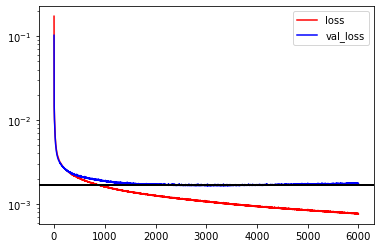

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.axhline(y=0.0017, xmin=0, xmax=5, linewidth=2, color = 'k')
plt.show()

In [9]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
#MLmodel_name = "NN_Model" + "_" + "AugVarStep_1to2StepbeforeFail_3Time_RemovebyClip_SmallThre"
MLmodel_name = "NN_Model" + "_" + "InitSet"
model.save(ML_Model_Path + MLmodel_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/jiayu/Desktop/MLP_DataSet/LargeSlope_TimeTrack_Angle_17_26//ML_Models/NN_Model_InitSet/assets


In [12]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [14]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 0
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-1.48599792e-01 -2.20208924e-01  7.12997719e-01  1.65661720e-01
  1.34084045e-01  3.76520638e-02 -3.95726390e-07 -3.77098398e-07
 -6.08962142e-08 -3.15454892e-01 -2.20656207e-01 -7.29762884e-02
  0.00000000e+00  3.88413298e-01  8.95748497e-01  5.92720317e-14
 -1.86586702e-01  8.95748497e-01  5.92720317e-14 -1.86586702e-01
 -1.16703862e-01  5.92720317e-14  3.88413298e-01 -1.16703862e-01
  5.92720317e-14 -1.86586702e-01 -1.10938149e-01 -3.64220536e-02
 -7.61586702e-01 -9.77180109e-02 -1.19933759e-01 -7.61586702e-01
 -1.08541881e+00 -2.76289571e-01 -1.86586702e-01 -1.09863894e+00
 -1.92777866e-01  3.88413298e-01 -1.12368781e-01 -2.73847377e-02
 -1.86586702e-01 -9.62873784e-02 -1.28971075e-01 -1.86586702e-01
 -1.08398817e+00 -2.85326887e-01  3.88413298e-01 -1.10006958e+00
 -1.83740550e-01  9.63413298e-01  8.98164808e-01 -1.52638542e-02
  3.88413298e-01  8.98164808e-01 -1.52638542e-02  3.88413298e-01
 -1.19120173e-01  1.52638542e-02  9.63413298e-01 -1.19120173e-01
  1.52638542e-02  9.63413

Data Kept Original Form, But need to scale back to meters
[0.09170891 0.09184977 0.09186065 0.09191408 0.09198821 0.09200946
 0.09201758 0.09218008 0.09223082 0.09224437 0.09233674 0.09234735
 0.09235063 0.09235147 0.09238873 0.09245817 0.0925     0.09262365
 0.09264829 0.09265358 0.09287855 0.09289413 0.09292944 0.092938
 0.0929395  0.0929516  0.09303008 0.09318722 0.0932069  0.09324668
 0.09326355 0.09326862 0.09329741 0.09334811 0.0933611  0.09337436
 0.09343613 0.09349772 0.09350335 0.09355315 0.09355683 0.09385148
 0.09386413 0.09395261 0.09405845 0.0941346  0.09418798 0.09421304
 0.09425042 0.09426934 0.09427249 0.0942746  0.09432416 0.09448607
 0.09450316 0.09450323 0.09452563 0.09456101 0.09459245 0.09464027
 0.09470372 0.09470511 0.09474469 0.09475928 0.09479339 0.0947954
 0.09481919 0.09490722 0.09500289 0.09513796 0.0951753  0.09524801
 0.09532972 0.09536966 0.0953817  0.09538544 0.0954343  0.09549102
 0.09551497 0.09555263 0.09556661 0.09559835 0.09563294 0.09571142
 0.0958

(array([ 6.,  8.,  4.,  2.,  1.,  2.,  5.,  4.,  3.,  2.,  3.,  2.,  1.,
        10.,  0.,  5.,  3.,  0.,  2.,  2.,  9.,  5.,  0.,  1.,  4.,  3.,
         8.,  3.,  1.,  1.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <BarContainer object of 30 artists>)

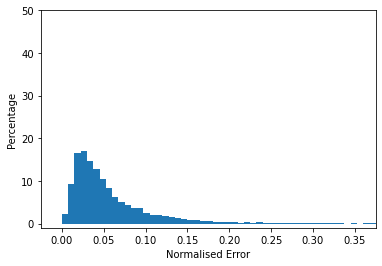

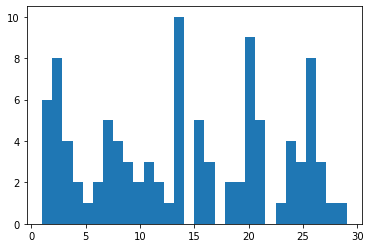

In [15]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
#err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)
err = np.linalg.norm(y_true_train_originalform[:,-3:]-y_pred_train_originalform[:,-3:], axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-100:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err, bins=30)

Data Kept Original Form, But need to scale back to meters
[0.02414507 0.02485377 0.02500038 ... 2.36714018 2.39423455 2.43331314]
Error Mean:  0.14145188940895104
Error Std 0.12557107580169172


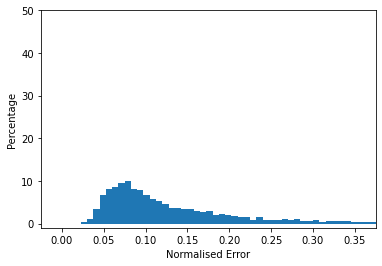

In [16]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



Data Kept Original Form, But need to scale back to meters
[0.02414507 0.02485377 0.02500038 ... 2.36714018 2.39423455 2.43331314]
Error Mean:  0.14145188940895104
Error Std 0.12557107580169172


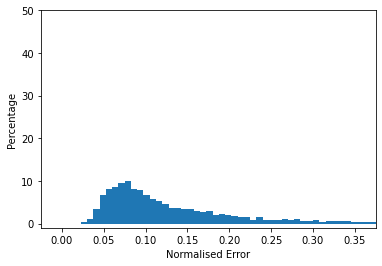

In [17]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())